### Functions

In [1]:
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    for x in unique_list: 
        print(x)

### Packages

In [3]:
from bs4 import BeautifulSoup 
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

### Changing Directories

In [6]:
#os.chdir('C:/Users/hange/Desktop/ANLY580FINAL/foodbase/foodbase')
os.getcwd()
#os.chdir('C:/Users/CF720/Documents/CDocuments/Georgetown/580/')

'/Users/CF720/Documents/CDocuments/Georgetown/ANLY580'

### Importing

In [8]:
#with open('FoodBase_curated.xml', 'r') as f: 
#    data = f.read() 
with open('foodbase/FoodBase_curated.xml', 'r') as f: 
    data = f.read() 

In [9]:
df = BeautifulSoup(data, "lxml") 

### Finding all Infons in DF

In [10]:
infons = df.find_all('infon')

### Converting bs4.element.Resultset to List

In [11]:
classlist = []
for x in infons:
    classlist.append(str(x))

# Extract all Categories/Class

### Only extracting 'Categories' (or the Class of each Recipe)

In [12]:
categories = [s for s in classlist if '<infon key="category">' in  s]

### Cleaning each Element in the List

In [13]:
categories = [s.replace('<infon key="category">','') for s in categories]
categories = [s.replace('</infon>','') for s in categories]

In [14]:
unique(categories)

Appetizers and snacks
Breakfast and Lunch
Desserts
Drinks
Dinners


# Extract all Recipe Instructions

In [15]:
dfList = []
for x in df:
    dfList.append(str(x))

In [16]:
dfList = dfList[1] # We only want the 2nd item in the original list

### Perform Multiple Splits to only get the Recipes

In [17]:
first = dfList.split('\n\t\t')

In [18]:
second = first[1::2] # Only odd elements

In [19]:
text = second

# Extract all Tags 

### Further Splits from Previous Splits

In [20]:
third = first[0::2] # Only even elements

In [21]:
del third[0] # Removing first element

### Only Taking Words that are inside Brackets

In [22]:
tags = []
for line in third:
    tag = re.findall(r"\[(.*?)\]", line)
    tags.append(tag)

# Combine all 3 Lists into Dataframes

### Lists:
- Categories: Tells us what type of Meal
- Text: Instructions for each Recipe
- Tags: Generalization of Ingrediends Used



In [23]:
print(len(categories), len(text), len(tags)) # Make sure they're extracted correctly

1000 1000 1000


In [24]:
recipes = pd.DataFrame(
    {'Category' : categories,
    'Instructions' : text, 
    'Tags' : tags})

In [25]:
recipes.head(2)

,Category,Instructions,Tags
0,Appetizers and snacks,"Mix the cream cheese, beef, olives, onion, and...","[Dairy produce, Cheese, Dishes and prepared fo..."
1,Appetizers and snacks,Preheat oven to 275 degrees F (135 degrees C)....,"[Stalk vegetables, Cheese, Preserve, Cheese, P..."


# Cleaning the Dataset

- Make Instructions to be a list of Ingredients 
- Make Tags a list so no duplications

### Make Instructions to be a list of Ingredients

#### Make a List of ALL Ingredients in the Dataset

In [26]:
ing = df.find_all('text')

In [27]:
ing = pd.Series(ing, name="texts")

In [28]:
ing = ing.tolist()

In [29]:
ing = set(ing)
ing = list(ing)

In [30]:
for i in range(len(ing)):
    ing[i] = str(ing[i]).replace("<text>", "").replace("</text>","")

In [31]:
for i in range(len(ing)):
    ing[i] = ing[i].lower()

In [32]:
ing.remove('together')

#### Split all Words in Instructions

In [33]:
ingredients = list(range(1000))

In [34]:
for i in range(len(text)):
    ingredients[i] = text[i].lower()

In [35]:
for i in range(len(ingredients)):
    ingredients[i] = ingredients[i].split()

In [36]:
for i in range(len(ingredients)):
    ingredients[i] = list(set(ingredients[i]) & set(ing))

In [37]:
ingredients[0]

['worcestershire', 'walnuts', 'cheese', 'sauce', 'cream', 'ball', 'roll']

### Make Tags a list of no duplications

In [38]:
for i in range(len(tags)):
    a = set(tags[i])
    b = list(a)
    tags[i] = b

# Cleaned Dataset

In [39]:
recipes = pd.DataFrame(
    {'Category' : categories,
    'Instructions' : text, 
    'Ingredients' : ingredients,
    'Tags' : tags})

In [40]:
recipes.sample(10)

,Category,Instructions,Ingredients,Tags
482,Desserts,Preheat oven to 350 degrees F (175 degrees C)....,"[vanilla, eggs, milk, sugar, cream, chocolate,...","[Meal, Setting table, Food, Salt, Substances f..."
302,Breakfast and Lunch,"Place bacon in a large, deep skillet. Cook ove...","[eggs, bacon, cheddar, cheese, hash, grease]","[Cheese, Dairy produce, Pork, Meat dishes, Pre..."
76,Appetizers and snacks,Preheat oven to 400 degrees F (200 degrees C)....,"[cheese, pepper, olive, cherry, oil, basil]","[Food, Fruits as vegetables, Particular vegeta..."
981,Dinners,Place beef chuck roast into a slow cooker and ...,"[salad, broth, beef, pepper, meat, dressing, r...","[Food, Setting table, Prepared vegetables and ..."
977,Dinners,Preheat oven to 350 degrees F (175 C). Place b...,"[mustard, bacon, beef, pork, casserole, butter]","[Food, Beef, Stalk vegetables, Additive, Part/..."
690,Drinks,Combine the chocolate chips and milk in a glas...,"[milk, coffee, powder, chocolate, chips]","[Food, Coffee, Dairy produce, Sweets, Spice, C..."
942,Dinners,"In a 6 quart Dutch oven, Place the beef briske...","[juices, potatoes, beef, garlic, leaves, meat,...","[Setting table, Food, Cabbage/kale, Beef, Part..."
506,Desserts,Preheat oven to 350 degrees F (175 degrees C)....,"[margarine, soda, sugar, cookie, egg, cream, e...","[Food, Meal, Setting table, Salt, Dishes and p..."
533,Desserts,Preheat oven to 375 degrees F (190 degrees C)....,"[sugar, cheese, batter, pie, cream, extracts, ...","[Food, Cake, Cheese, Dairy produce, Sweetener ..."
743,Drinks,"Place the banana, grapes, yogurt, apple and sp...","[apple, spinach]","[Leaf vegetables, Fruit/a fruit, Dairy produce..."


### Exported as CSV

In [41]:
#recipes.to_csv('recipes.csv')

# Exploratory Data Analysis

In [42]:
recipes['Category'].value_counts()

Drinks                   200
Breakfast and Lunch      200
Appetizers and snacks    200
Dinners                  200
Desserts                 200
Name: Category, dtype: int64

In [43]:
counts = recipes['Category'].value_counts()

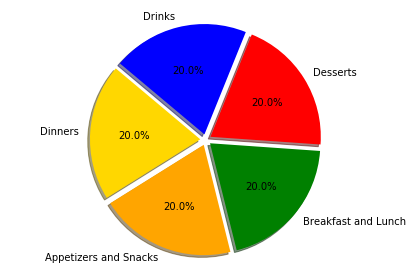

In [260]:
labels = 'Dinners', 'Appetizers and Snacks', 'Breakfast and Lunch', 'Desserts', 'Drinks'
sizes = [200, 200, 200, 200, 200]
colors = ['gold', 'orange', 'green', 'red', 'blue']
plt.pie(sizes, labels = labels, colors = colors, 
       autopct = '%1.1f%%', shadow = True, startangle = 140, explode = (.05, .05, .05, .05, .05))
#patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=140)
#plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.savefig('Recipes_Distribution.png')
plt.show()

### The curated dataset has equal amount of category levels (200 observations for each meal)

## Wordclouds for Each Meal's Instructions

#### Create new mini dataframes for each category/meal

In [45]:
Drink = recipes[recipes['Category'] == 'Drinks']
Dessert = recipes[recipes['Category'] == 'Desserts']
Dinner = recipes[recipes['Category'] == 'Dinners']
Appetizer = recipes[recipes['Category'] == 'Appetizers and snacks']
Brunch = recipes[recipes['Category'] == 'Breakfast and Lunch']

In [46]:
drink_words = ''
dessert_words = ''
dinner_words = ''
appetizer_words = ''
brunch_words = ''
stopwords = set(STOPWORDS)

In [47]:
stopwords = list(stopwords)
words = ['add', 'minute', 'place', 'degrees', 'mixture', 'stir', 'minutes', "'"] # reupdating stopwords
for i in words:
    stopwords.append(i)
stopwords = set(stopwords)

In [48]:
for val in Drink.Instructions:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    drink_words += " ".join(tokens)+" "
for val in Dessert.Instructions:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    dessert_words += " ".join(tokens)+" "
for val in Dinner.Instructions:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    dinner_words += " ".join(tokens)+" "
for val in Appetizer.Instructions:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    appetizer_words += " ".join(tokens)+" "
for val in Brunch.Instructions:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    brunch_words += " ".join(tokens)+" "

In [49]:
drink_wc = WordCloud(width = 1600, height = 1600, background_color= 'white', stopwords = stopwords, min_font_size = 10).generate(drink_words)
dessert_wc = WordCloud(width = 1600, height = 1600, background_color= 'black', stopwords = stopwords, min_font_size = 10).generate(dessert_words)
dinner_wc = WordCloud(width = 1600, height = 1600, background_color= 'white', stopwords = stopwords, min_font_size = 10).generate(dinner_words)
appetizer_wc = WordCloud(width = 1600, height = 1600, background_color= 'black', stopwords = stopwords, min_font_size = 10).generate(appetizer_words)
brunch_wc = WordCloud(width = 1600, height = 1600, background_color= 'white', stopwords = stopwords, min_font_size = 10).generate(brunch_words)

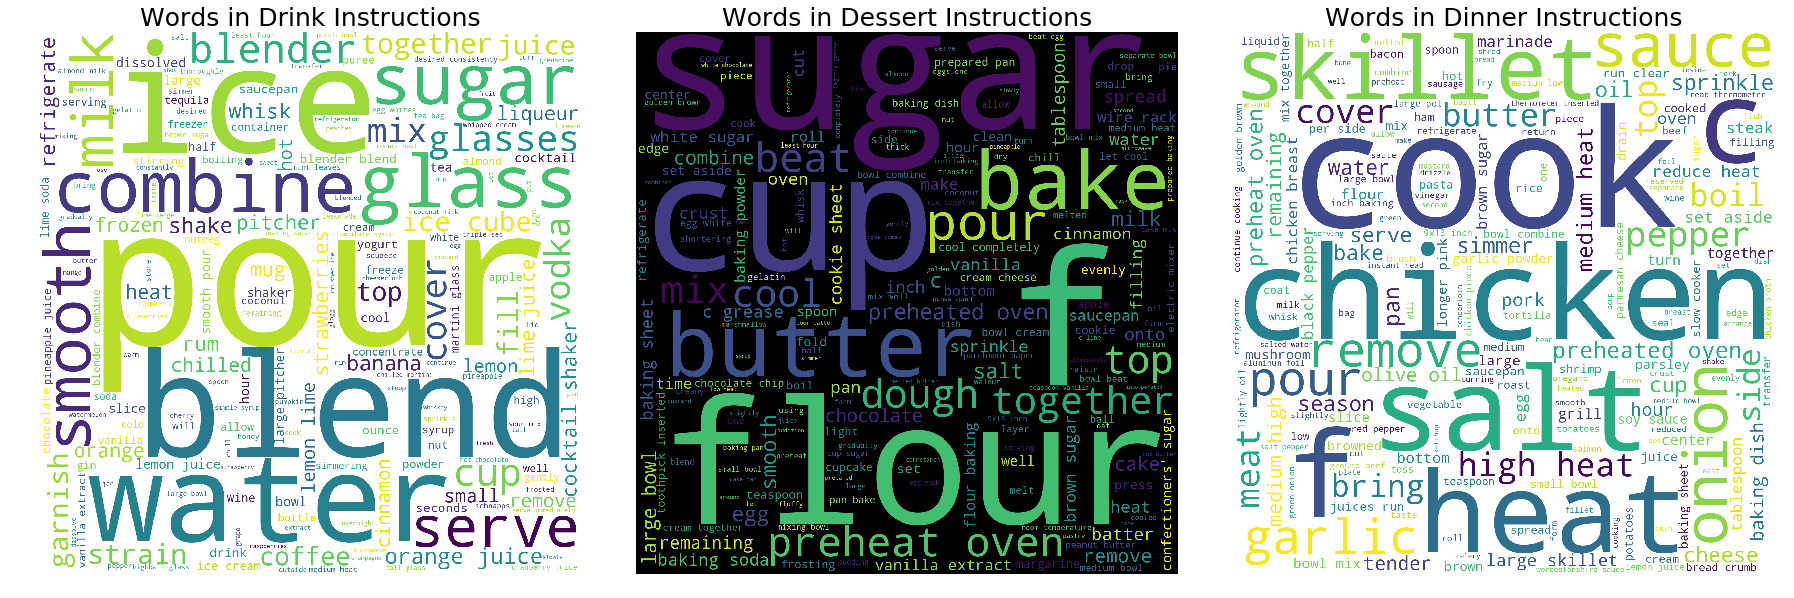

In [50]:
plt.figure(figsize = (25, 25), facecolor = None) 
plt.subplot(131)
plt.imshow(drink_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Drink Instructions', size = 25)
plt.savefig('drink_ins_wc.png')
plt.subplot(132)
plt.imshow(dessert_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Dessert Instructions', size = 25)
plt.savefig('dessert_ins_wc.png')
plt.subplot(133)
plt.imshow(dinner_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Dinner Instructions', size = 25)
plt.savefig('dinner_ins_wc.png')

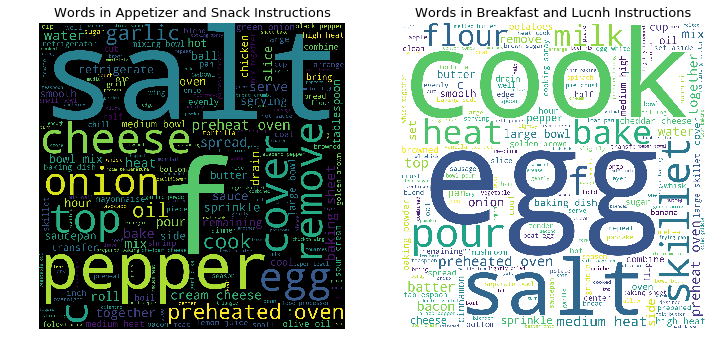

In [51]:
plt.figure(figsize = (15, 15), facecolor = None) 
plt.subplot(131)
plt.imshow(appetizer_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Appetizer and Snack Instructions', size = 13)
plt.savefig('appetizer_ins_wc.png')
plt.subplot(132)
plt.imshow(brunch_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Breakfast and Lucnh Instructions', size = 13)
plt.savefig('brunch_ins_wc.png')

## Wordclouds for Each Meal's Ingredients

In [245]:
drink_words = ''
dessert_words = ''
dinner_words = ''
appetizer_words = ''
brunch_words = ''

In [246]:
for val in Drink.Ingredients:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    drink_words += " ".join(tokens)+" "
for val in Dessert.Ingredients:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    dessert_words += " ".join(tokens)+" "
for val in Dinner.Ingredients:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    dinner_words += " ".join(tokens)+" "
for val in Appetizer.Ingredients:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    appetizer_words += " ".join(tokens)+" "
for val in Brunch.Ingredients:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    brunch_words += " ".join(tokens)+" "

In [247]:
drink_wc = WordCloud(width = 1600, height = 1600, background_color= 'white', stopwords = stopwords, min_font_size = 10).generate(drink_words)
dessert_wc = WordCloud(width = 1600, height = 1600, background_color= 'black', stopwords = stopwords, min_font_size = 10).generate(dessert_words)
dinner_wc = WordCloud(width = 1600, height = 1600, background_color= 'white', stopwords = stopwords, min_font_size = 10).generate(dinner_words)
appetizer_wc = WordCloud(width = 1600, height = 1600, background_color= 'black', stopwords = stopwords, min_font_size = 10).generate(appetizer_words)
brunch_wc = WordCloud(width = 1600, height = 1600, background_color= 'white', stopwords = stopwords, min_font_size = 10).generate(brunch_words)

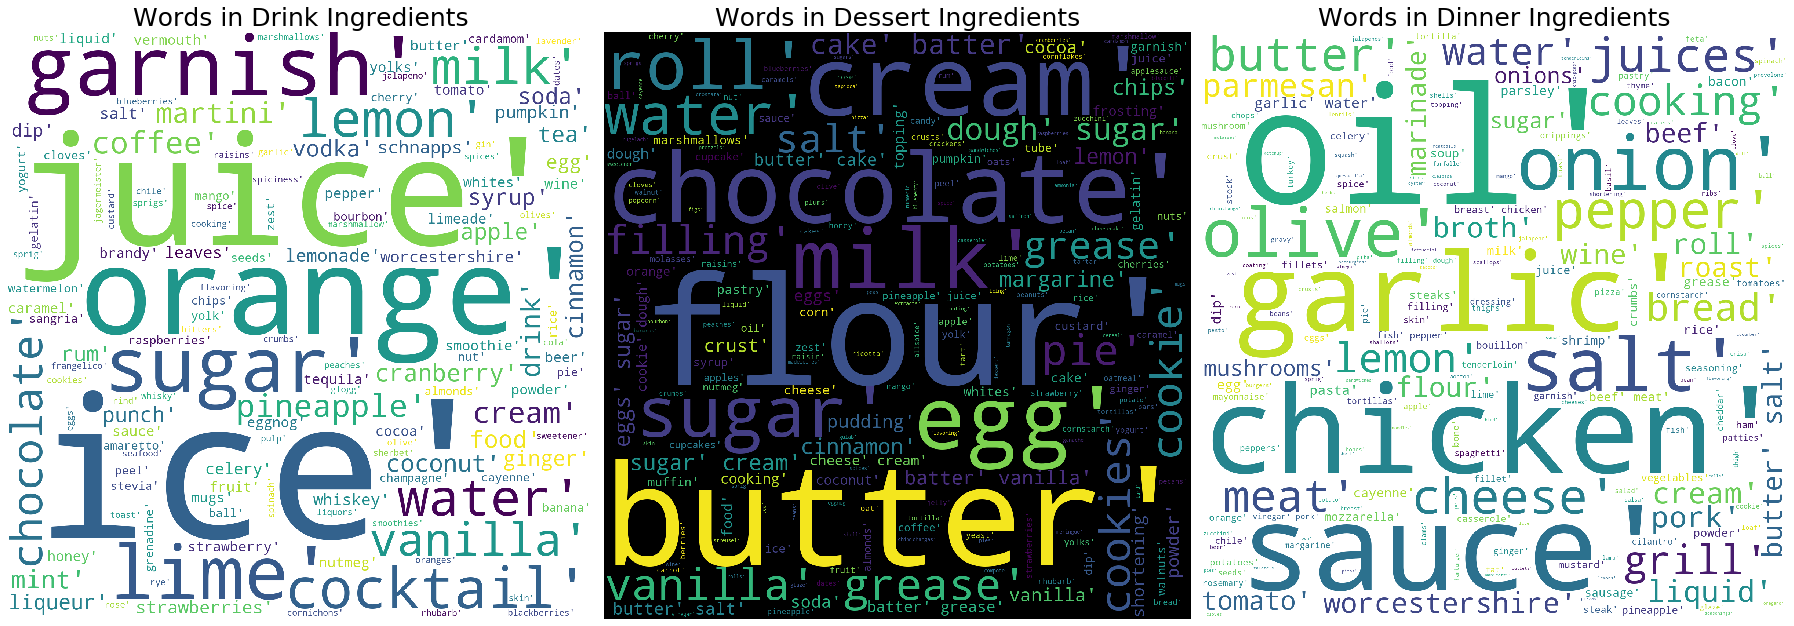

In [248]:
plt.figure(figsize = (25, 25), facecolor = None) 
plt.subplot(131)
plt.imshow(drink_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Drink Ingredients', size = 25)
plt.savefig('drink_wc.png')
plt.subplot(132)
plt.imshow(dessert_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Dessert Ingredients', size = 25)
plt.savefig('dessert_wc.png')
plt.subplot(133)
plt.imshow(dinner_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Dinner Ingredients', size = 25)
plt.savefig('dinner_wc.png')

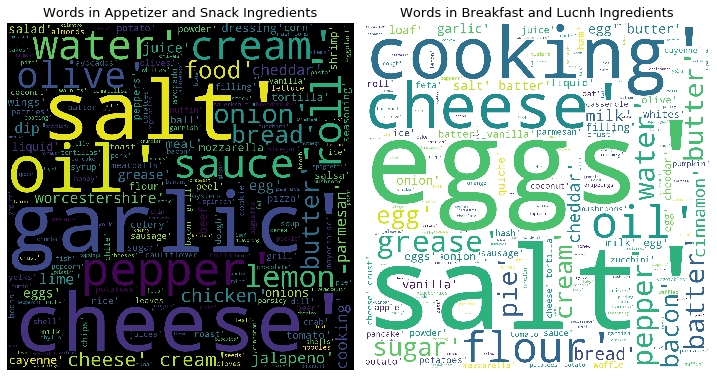

In [249]:
plt.figure(figsize = (15, 15), facecolor = None) 
plt.subplot(131)
plt.imshow(appetizer_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Appetizer and Snack Ingredients', size = 13)
plt.savefig('appetizer_wc.png')
plt.subplot(132)
plt.imshow(brunch_wc)
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.title('Words in Breakfast and Lucnh Ingredients', size = 13)
plt.savefig('brunch_wc.png')

In [52]:
recipes.head()

,Category,Instructions,Ingredients,Tags
0,Appetizers and snacks,"Mix the cream cheese, beef, olives, onion, and...","[worcestershire, walnuts, cheese, sauce, cream...","[Beef, Fruit containing stone, Cheese, Sauce/d..."
1,Appetizers and snacks,Preheat oven to 275 degrees F (135 degrees C)....,"[tortilla, cheese, almonds, parmesan, mozzarel...","[Food, Stalk vegetables, Cheese, Sauce/dressin..."
2,Appetizers and snacks,Bring a small saucepan of water to boil. Turn ...,"[provolone, cheese, cream, loaf, tomatoes, gar...","[Food, Fruits as vegetables, Cheese, Water, Da..."
3,Appetizers and snacks,Mash garlic with the salt in a small bowl. Pla...,"[pita, olive, garlic, lemon, salt, water, food...","[Setting table, Food, Citrus fruit, Salt, Frui..."
4,Appetizers and snacks,Preheat oven to 350 degrees F (175 degrees C)....,"[tortilla, sauce, cheese, cookie, corn, tortil...","[Food, Corn/cereals/grain, Fowls, Cheese, Sauc..."


# Modeling

Here we look to build multi-class classification models for the dataset and compare which models does the best job. 

The methods we will look at are Decision Trees, SVM, KNN, and Naive Bayes.

First we will perform one-hot encoding and make dataframes for both ingredients and Tags. We will then compare which of the models based of the respective dataframes perform better.

In [113]:
# one-hot encoding for ingredients 
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

Ingredients_df = pd.DataFrame(mlb.fit_transform(recipes.Ingredients),
                   columns=mlb.classes_,
                   index=recipes.index)
print("Ingredients Dataframe Info")
print(len(Ingredients_df))
print(len(Ingredients_df.columns))
#print(Ingredients_df.head())

print(" ")
print(" ")

Tags_df = pd.DataFrame(mlb.fit_transform(recipes.Tags),
                   columns=mlb.classes_,
                   index=recipes.index)
print("Tags Dataframe Info")
print(len(Tags_df))
print(len(Tags_df.columns))
#print(Tags_df.head())

Ingredients Dataframe Info
1000
457
 
 
Tags Dataframe Info
1000
150


In [114]:
Ingredients_df['Category'] = recipes.Category
Tags_df['Category'] = recipes.Category

In [117]:
Ingredients_df.head()

,allspice,almonds,amaretto,ammonia,apple,apples,applesauce,artichokes,asparagus,avocado,...,wings,wonton,worcestershire,yeast,yogurt,yolk,yolks,zest,zucchini,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Appetizers and snacks
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks


In [119]:
Tags_df.head()

,Additive,Aerated/carbonated drink,Ale/beer,"Algae, seaweed",Amounts of food,Animal body,Animal food,Animals,Animals for food,Appetite,...,Thirst,Valued plants and weeds,Vegetables,Water,Wine,Wine-making,"Wood, other part of tree/woody plant",Yielding condiments/used in food preparation,Yielding fibre/thatching/basket material,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Appetizers and snacks
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Appetizers and snacks
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Appetizers and snacks


## Test/Train Split

In [62]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  

In [121]:
#Ingredients_df.iloc[:, 457]

0      Appetizers and snacks
1      Appetizers and snacks
2      Appetizers and snacks
3      Appetizers and snacks
4      Appetizers and snacks
5      Appetizers and snacks
6      Appetizers and snacks
7      Appetizers and snacks
8      Appetizers and snacks
9      Appetizers and snacks
10     Appetizers and snacks
11     Appetizers and snacks
12     Appetizers and snacks
13     Appetizers and snacks
14     Appetizers and snacks
15     Appetizers and snacks
16     Appetizers and snacks
17     Appetizers and snacks
18     Appetizers and snacks
19     Appetizers and snacks
20     Appetizers and snacks
21     Appetizers and snacks
22     Appetizers and snacks
23     Appetizers and snacks
24     Appetizers and snacks
25     Appetizers and snacks
26     Appetizers and snacks
27     Appetizers and snacks
28     Appetizers and snacks
29     Appetizers and snacks
               ...          
970                  Dinners
971                  Dinners
972                  Dinners
973           

In [157]:
# Ingredients
X_trainI, X_testI, y_trainI, y_testI = train_test_split(Ingredients_df.iloc[:, 0:456], 
                                                    Ingredients_df.iloc[:, 457], test_size=0.2, random_state=42)

print("Ingredients X Train Info")
X_trainI.info()
print(" ")
print("Ingredients X Test Info")
X_testI.info()
print(" ")
print(" ")
print("Ingredients y Train Head")
print(y_trainI.head())
print(y_trainI.unique())
print(" ")
print("Ingredients y Train Head")
print(y_testI.head())
print(y_testI.unique())

print(" ")
print(" ")
print(" ")
print(" ")
# Tags
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Tags_df.iloc[:, 0:149], 
                                                    Tags_df.iloc[:, 150], test_size=0.2, random_state=42)

print("Tags X Train Info")
X_trainT.info()
print(" ")
print("Tags X Test Info")
X_testT.info()
print(" ")
print(" ")
print("Tags y Train Head")
print(y_trainT.head())
print(y_trainT.unique())
print(" ")
print("Tags y Train Head")
print(y_testT.head())
print(y_testT.unique())

Ingredients X Train Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Columns: 456 entries, allspice to zest
dtypes: int64(456)
memory usage: 2.8 MB
 
Ingredients X Test Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 521 to 78
Columns: 456 entries, allspice to zest
dtypes: int64(456)
memory usage: 714.1 KB
 
 
Ingredients y Train Head
29     Appetizers and snacks
535                 Desserts
695                   Drinks
557                 Desserts
836                  Dinners
Name: Category, dtype: object
['Appetizers and snacks' 'Desserts' 'Drinks' 'Dinners'
 'Breakfast and Lunch']
 
Ingredients y Train Head
521    Desserts
737      Drinks
740      Drinks
660      Drinks
411    Desserts
Name: Category, dtype: object
['Desserts' 'Drinks' 'Dinners' 'Appetizers and snacks'
 'Breakfast and Lunch']
 
 
 
 
Tags X Train Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Columns: 149 entries, Additive to Yielding co

In [194]:
X_trainI.to_csv('Ingredeints_TrainX.csv')
X_testI.to_csv('Ingredeints_TestX.csv')
y_trainI.to_csv('Ingredeints_TrainY.csv')
y_testI.to_csv('Ingredeints_TestY.csv')
X_trainT.to_csv('Tags_TrainX.csv')
X_testT.to_csv('Tags_TestX.csv')
y_trainT.to_csv('Tags_TrainY.csv')
y_testT.to_csv('Tags_TestY.csv')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
/anaconda3/lib/p

In [155]:
print(type(y_trainT))
print(y_trainT.unique())

print(type(y_testT))
print(y_testT.unique())

<class 'pandas.core.series.Series'>
['Appetizers and snacks' 'Desserts' 'Drinks' 'Dinners'
 'Breakfast and Lunch']
<class 'pandas.core.series.Series'>
['Desserts' 'Drinks' 'Dinners' 'Appetizers and snacks'
 'Breakfast and Lunch']


In [292]:
#!pip install -U scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn import tree
from sklearn.utils.multiclass import unique_labels

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.23.2)


## Decision Tree

Ingredients
[[14  4  2 10  3]
 [ 3 31  5  6  3]
 [ 4  8 21  0  4]
 [11  1  1 29  2]
 [ 1  5  2  0 30]]


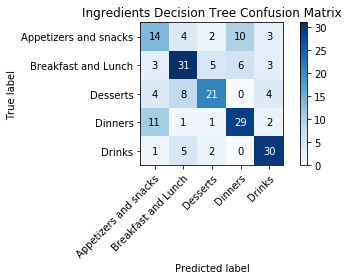

125
62.5 % Accuracy
F1 Score 0.62
Precision 0.62
Recall 0.62
 
Tags
[[18  2  4  9  0]
 [ 9 25  6  2  6]
 [ 1 13 19  0  4]
 [16  2  1 25  0]
 [ 0  1  5  0 32]]


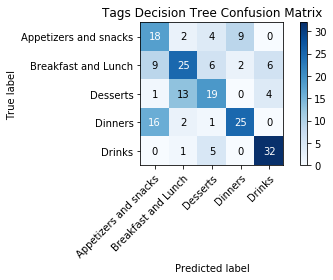

119
59.5 % Accuracy
F1 Score 0.59
Precision 0.6
Recall 0.6


In [311]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

# ingredients
dtree_modelI = DecisionTreeClassifier().fit(X_trainI, y_trainI) 
dtree_predictionsI = dtree_modelI.predict(X_testI) 

# creating a confusion matrix 
cmI_DT = confusion_matrix(y_testI, dtree_predictionsI,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 
print("Ingredients")
print(cmI_DT)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Ingredients Decision Tree Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmI_DT, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmI_DT.shape[1]),
       yticks=np.arange(cmI_DT.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmI_DT.max() / 2.
for i in range(cmI_DT.shape[0]):
    for j in range(cmI_DT.shape[1]):
        ax.text(j, i, format(cmI_DT[i, j], fmt),
        ha="center", va="center",
        color="white" if cmI_DT[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmI_DT))
print((np.trace(cmI_DT)/200)*100,"% Accuracy")
print("F1 Score", round(f1_score(y_testI, dtree_predictionsI, average="macro"),2))
print("Precision", round(precision_score(y_testI, dtree_predictionsI, average="macro"),2))
print("Recall", round(recall_score(y_testI, dtree_predictionsI, average="macro"),2))    

print(" ")

# Tags
dtree_modelT = DecisionTreeClassifier().fit(X_trainT, y_trainT) 
dtree_predictionsT = dtree_modelT.predict(X_testT) 

# creating a confusion matrix 
cmT_DT = confusion_matrix(y_testT, dtree_predictionsT, labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 
print("Tags")
print(cmT_DT)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Tags Decision Tree Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmT_DT, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmT_DT.shape[1]),
       yticks=np.arange(cmT_DT.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmI_DT.max() / 2.
for i in range(cmT_DT.shape[0]):
    for j in range(cmT_DT.shape[1]):
        ax.text(j, i, format(cmT_DT[i, j], fmt),
        ha="center", va="center",
        color="white" if cmT_DT[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmT_DT))
print((np.trace(cmT_DT)/200)*100,"% Accuracy")
print("F1 Score", round(f1_score(y_testT, dtree_predictionsT, average="macro"),2))
print("Precision", round(precision_score(y_testT, dtree_predictionsT, average="macro"),2))
print("Recall", round(recall_score(y_testT, dtree_predictionsT, average="macro"),2))    

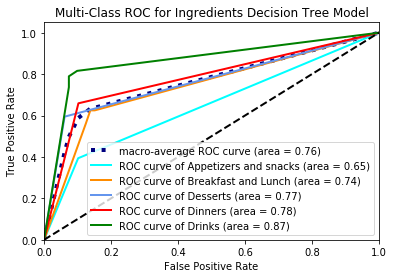

In [243]:
# Ingredients
DT_scoreI = dtree_modelI.predict_proba(X_testI)
y_testI_onehot = pd.get_dummies(y_testI)


#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testI_onehot.iloc[:, i], DT_scoreI[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Ingredients Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

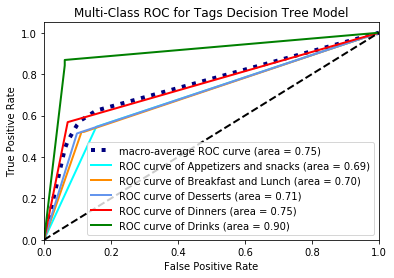

In [312]:
# Tags
DT_scoreT = dtree_modelT.predict_proba(X_testT)
y_testT_onehot = pd.get_dummies(y_testT)

#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testT_onehot.iloc[:, i], DT_scoreT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Tags Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

## SVM

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Ingredients
[[24  2  2  3  2]
 [ 5 29  4  4  6]
 [ 1  4 31  1  0]
 [ 9  2  1 32  0]
 [ 0  0  0  0 38]]


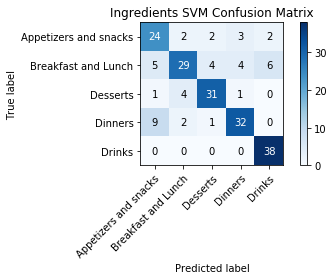

154
77.0 % Accuracy
F1 Score 0.77
Precision 0.77
Recall 0.78
 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tags
[[24  1  2  6  0]
 [ 9 24  4  6  5]
 [ 2  5 28  0  2]
 [12  0  0 32  0]
 [ 0  1  2  0 35]]


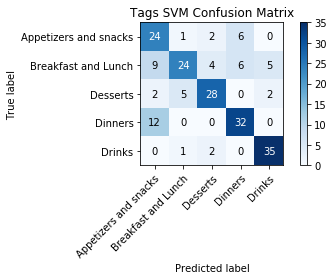

143
71.5 % Accuracy
F1 Score 0.72
Precision 0.72
Recall 0.73


In [316]:
# training a linear SVM classifier 
from sklearn.svm import LinearSVC

# Ingrediants 
svm_model_linearI = LinearSVC(multi_class = 'crammer_singer').fit(X_trainI, y_trainI) 
svm_predictionsI = svm_model_linearI.predict(X_testI) 

# model accuracy for X_test 
#accuracyI = svm_predictionsI.score(X_testI, y_testI) 

# creating a confusion matrix 
cmI_SVM = confusion_matrix(y_testI, svm_predictionsI,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 

#print(accuracyI)
print("Ingredients")
print(cmI_SVM)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Ingredients SVM Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmI_SVM, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmI_SVM.shape[1]),
       yticks=np.arange(cmI_SVM.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmI_SVM.max() / 2.
for i in range(cmI_SVM.shape[0]):
    for j in range(cmI_SVM.shape[1]):
        ax.text(j, i, format(cmI_SVM[i, j], fmt),
        ha="center", va="center",
        color="white" if cmI_SVM[i, j] > thresh else "black")

fig.tight_layout()
plt.savefig('Best_Confusion_Matrix.png')
plt.show()
print(np.trace(cmI_SVM))
print((np.trace(cmI_SVM)/200)*100,"% Accuracy")
print("F1 Score", round(f1_score(y_testT, svm_predictionsI, average="macro"),2))
print("Precision", round(precision_score(y_testT, svm_predictionsI, average="macro"),2))
print("Recall", round(recall_score(y_testT, svm_predictionsI, average="macro"),2))  

print(" ")

# Tags
svm_model_linearT = LinearSVC(multi_class = 'crammer_singer').fit(X_trainT, y_trainT) 
svm_predictionsT = svm_model_linearT.predict(X_testT) 

# model accuracy for X_test 
#accuracyI = svm_predictionsI.score(X_test, y_test) 

# creating a confusion matrix 
cmT_SVM = confusion_matrix(y_testT, svm_predictionsT,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 
print("Tags")
print(cmT_SVM)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Tags SVM Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmT_SVM, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmT_SVM.shape[1]),
       yticks=np.arange(cmT_SVM.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmT_SVM.max() / 2.
for i in range(cmT_SVM.shape[0]):
    for j in range(cmT_SVM.shape[1]):
        ax.text(j, i, format(cmT_SVM[i, j], fmt),
        ha="center", va="center",
        color="white" if cmT_SVM[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmT_SVM))
print((np.trace(cmT_SVM)/200)*100,"% Accuracy")
print("F1 Score", round(f1_score(y_testT, svm_predictionsT, average="macro"),2))
print("Precision", round(precision_score(y_testT, svm_predictionsT, average="macro"),2))
print("Recall", round(recall_score(y_testT, svm_predictionsT, average="macro"),2))  

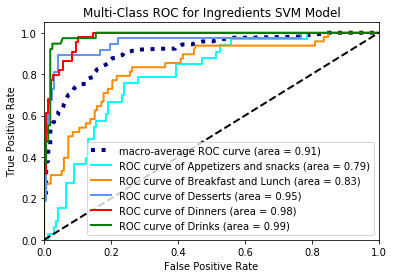

In [258]:
# Ingredients
SVM_scoreI = svm_model_linearI.decision_function(X_testI)


#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testI_onehot.iloc[:, i], SVM_scoreI[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Ingredients SVM Model')
plt.legend(loc="lower right")
plt.savefig('Best_ROC.png')
plt.show()

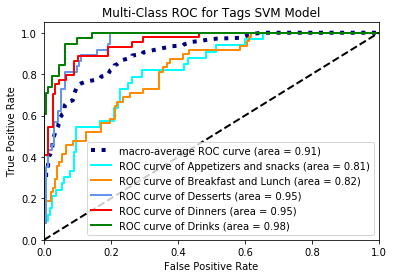

In [314]:
# Tags
SVM_scoreT = svm_model_linearT.decision_function(X_testT)


#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testT_onehot.iloc[:, i], SVM_scoreT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Tags SVM Model')
plt.legend(loc="lower right")
plt.show()

## KNN

Ingredients
[[11 15  0  1  6]
 [ 4 37  2  0  5]
 [ 0  9 20  0  8]
 [16 12  2 13  1]
 [ 0  5  0  0 33]]


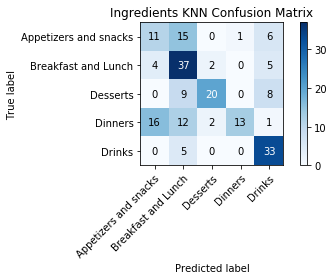

114
57.0 % Accuracy
F1 Score 0.55
Precision 0.64
Recall 0.56
 
Tags
[[21  2  1  8  1]
 [ 9 25  2  3  9]
 [ 2  7 23  0  5]
 [15  1  0 28  0]
 [ 1  0  1  0 36]]


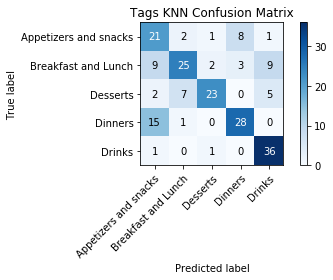

133
66.5 % Accuracy
F1 Score 0.66
Precision 0.69
Recall 0.67


In [315]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 

# Ingredients 
knnI = KNeighborsClassifier(n_neighbors = 7).fit(X_trainI, y_trainI) 
  
# accuracy on X_test 
accuracyI = knnI.score(X_testI, y_testI) 
#print(accuracyI)
  
# creating a confusion matrix 
knnI_predictions = knnI.predict(X_testI)  
cmI_KNN = confusion_matrix(y_testI, knnI_predictions,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 

print("Ingredients")
print(cmI_KNN)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Ingredients KNN Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmI_KNN, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmI_KNN.shape[1]),
       yticks=np.arange(cmI_KNN.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmI_KNN.max() / 2.
for i in range(cmI_KNN.shape[0]):
    for j in range(cmI_KNN.shape[1]):
        ax.text(j, i, format(cmI_KNN[i, j], fmt),
        ha="center", va="center",
        color="white" if cmI_KNN[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmI_KNN))
print(round((np.trace(cmI_KNN)/200)*100,2),"% Accuracy")
print("F1 Score", round(f1_score(y_testI, knnI_predictions, average="macro"),2))
print("Precision", round(precision_score(y_testI, knnI_predictions, average="macro"),2))
print("Recall", round(recall_score(y_testI, knnI_predictions, average="macro"),2))  

print(" ")

# Tags 
knnT = KNeighborsClassifier(n_neighbors = 7).fit(X_trainT, y_trainT) 
  
# accuracy on X_test 
accuracyT = knnT.score(X_testT, y_testT) 
#print(accuracyT)
  
# creating a confusion matrix 
knnT_predictions = knnT.predict(X_testT)  
cmT_KNN = confusion_matrix(y_testT, knnT_predictions,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 

print("Tags")
print(cmT_KNN)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Tags KNN Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmT_KNN, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmT_KNN.shape[1]),
       yticks=np.arange(cmT_KNN.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmT_KNN.max() / 2.
for i in range(cmT_KNN.shape[0]):
    for j in range(cmT_KNN.shape[1]):
        ax.text(j, i, format(cmT_KNN[i, j], fmt),
        ha="center", va="center",
        color="white" if cmT_KNN[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmT_KNN))
print(round((np.trace(cmT_KNN)/200)*100,2),"% Accuracy")
print("F1 Score", round(f1_score(y_testT, knnT_predictions, average="macro"),2))
print("Precision", round(precision_score(y_testT, knnT_predictions, average="macro"),2))
print("Recall", round(recall_score(y_testT, knnT_predictions, average="macro"),2))  

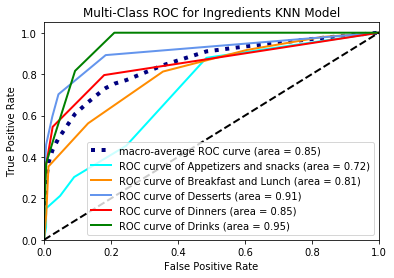

In [254]:
# Ingredients
KNN_scoreI = knnI.predict_proba(X_testI)

#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testI_onehot.iloc[:, i], KNN_scoreI[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Ingredients KNN Model')
plt.legend(loc="lower right")
plt.show()

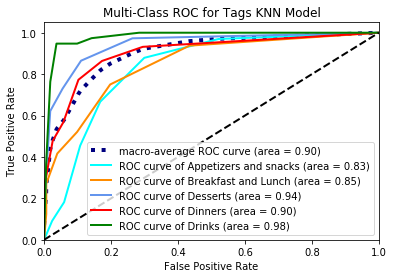

In [255]:
# Ingredients
KNN_scoreT = knnT.predict_proba(X_testT)

#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testT_onehot.iloc[:, i], KNN_scoreT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Tags KNN Model')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

Ingredients
[[21  3  1  4  4]
 [ 8 27  4  2  7]
 [ 1  2 32  0  2]
 [ 8  0  0 36  0]
 [ 0  0  0  0 38]]


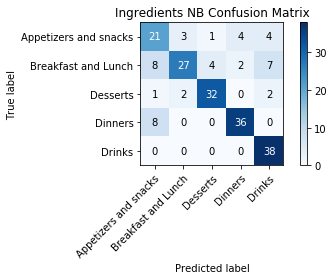

154
77.0 % Accuracy
F1 Score 0.76
Precision 0.77
Recall 0.78
 
Tags
[[19  0  2 11  1]
 [ 9 16 10  6  7]
 [ 1  3 30  0  3]
 [ 8  0  0 36  0]
 [ 0  0  1  0 37]]


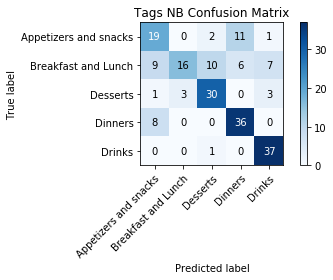

138
69.0 % Accuracy
F1 Score 0.67
Precision 0.7
Recall 0.7


In [320]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import BernoulliNB 

# Ingredients 
gnbI = BernoulliNB().fit(X_trainI, y_trainI) 
gnb_predictionsI = gnbI.predict(X_testI) 
  
# accuracy on X_test 
accuracyI = gnbI.score(X_testI, y_testI) 
#print(accuracyI)
  
# creating a confusion matrix 
cmI_NB = confusion_matrix(y_testI, gnb_predictionsI,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 


print("Ingredients")
print(cmI_NB)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Ingredients NB Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmI_NB, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmI_NB.shape[1]),
       yticks=np.arange(cmI_NB.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmI_NB.max() / 2.
for i in range(cmI_NB.shape[0]):
    for j in range(cmI_NB.shape[1]):
        ax.text(j, i, format(cmI_NB[i, j], fmt),
        ha="center", va="center",
        color="white" if cmI_NB[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmI_NB))
print(round((np.trace(cmI_NB)/200)*100,2),"% Accuracy")
print("F1 Score", round(f1_score(y_testI, gnb_predictionsI, average="macro"),2))
print("Precision", round(precision_score(y_testI, gnb_predictionsI, average="macro"),2))
print("Recall", round(recall_score(y_testI, gnb_predictionsI, average="macro"),2))  

print(" ")

# Tags 
gnbT = BernoulliNB().fit(X_trainT, y_trainT) 
gnb_predictionsT = gnbT.predict(X_testT) 
  
# accuracy on X_test 
accuracyT = gnbT.score(X_testT, y_testT) 
#print(accuracyI)
  
# creating a confusion matrix 
cmT_NB = confusion_matrix(y_testT, gnb_predictionsT,  labels=['Appetizers and snacks', 'Breakfast and Lunch', 
                                                            'Desserts', 'Dinners', 'Drinks']) 


print("Tags")
print(cmT_NB)
classes = ['Appetizers and snacks', 'Breakfast and Lunch', 'Desserts', 'Dinners', 'Drinks']
title = "Tags NB Confusion Matrix"

fig, ax = plt.subplots()
im = ax.imshow(cmT_NB, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cmT_NB.shape[1]),
       yticks=np.arange(cmT_NB.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cmT_NB.max() / 2.
for i in range(cmT_NB.shape[0]):
    for j in range(cmT_NB.shape[1]):
        ax.text(j, i, format(cmT_NB[i, j], fmt),
        ha="center", va="center",
        color="white" if cmT_NB[i, j] > thresh else "black")

fig.tight_layout()

plt.show()
print(np.trace(cmT_NB))
print(round((np.trace(cmT_NB)/200)*100,2),"% Accuracy")
print("F1 Score", round(f1_score(y_testT, gnb_predictionsT, average="macro"),2))
print("Precision", round(precision_score(y_testT, gnb_predictionsT, average="macro"),2))
print("Recall", round(recall_score(y_testT, gnb_predictionsT, average="macro"),2))  

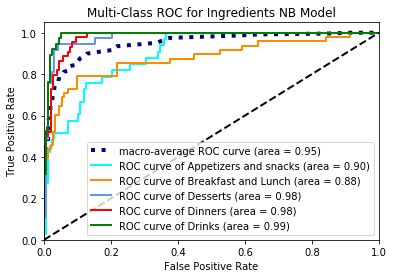

In [321]:
# Ingredients
NB_scoreI = gnbI.predict_proba(X_testI)

#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testI_onehot.iloc[:, i], NB_scoreI[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Ingredients NB Model')
plt.legend(loc="lower right")
plt.show()

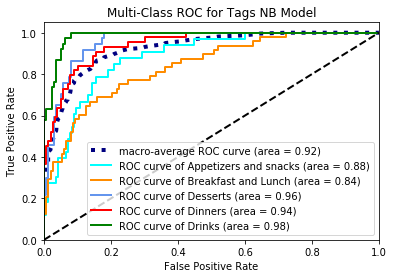

In [322]:
# Ingredients
NB_scoreT = gnbT.predict_proba(X_testT)

#print(DT_scoreI)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_testT_onehot.iloc[:, i], NB_scoreT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
labels = ['Appetizers and snacks', 'Breakfast and Lunch','Desserts', 'Dinners', 'Drinks']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC for Tags NB Model')
plt.legend(loc="lower right")
plt.show()